In [1]:
import pandas as pd
import numpy as np
import os
import glob
from pathlib import Path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
games = pd.read_csv('games.csv')
# mechanics =  pd.read_csv('mechanics.csv')
# themes =  pd.read_csv('themes.csv')
user_ratings =  pd.read_csv('user_ratings.csv')

In [3]:
columns_to_keep = ['BGGId', 'YearPublished', 'GameWeight','NumWish','MfgPlaytime','MfgAgeRec','NumAlternates','NumExpansions','NumImplementations','Kickstarted',
                   'Cat:Thematic','Cat:Strategy','Cat:War','Cat:Family','Cat:CGS','Cat:Abstract','Cat:Party','Cat:Childrens']

In [4]:
games_all = games[columns_to_keep]

In [5]:
# merged_df = pd.merge(games_all, mechanics, on='BGGId')
# games_all = pd.merge(merged_df, themes, on='BGGId')

In [6]:
from sklearn.preprocessing import LabelEncoder

column_to_encode = 'Username'
label_encoder = LabelEncoder()
user_ratings[column_to_encode] = label_encoder.fit_transform(user_ratings[column_to_encode])

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [8]:
# percentage_to_keep = 0.05
# num_rows_to_keep = int(len(user_ratings) * percentage_to_keep)

# # Keep 10% of the rows randomly
# ur_sub = user_ratings.sample(n=num_rows_to_keep, random_state=42)

user_votes = user_ratings.groupby('Username').size().reset_index(name='vote_count')

# Step 2: Sort users by vote count in descending order
sorted_users = user_votes.sort_values(by='vote_count', ascending=False)

# Step 3: Select the top 10% of users
percentage_to_keep = 0.10
num_users_to_keep = int(len(sorted_users) * percentage_to_keep)
top_users = sorted_users.head(num_users_to_keep)

# Step 4: Filter the original DataFrame to keep only rows corresponding to the selected users
ur_sub = user_ratings[user_ratings['Username'].isin(top_users['Username'])]

In [9]:
del games
# del themes
# del mechanics
del user_ratings

In [10]:
total = pd.merge(ur_sub, games_all, on='BGGId')

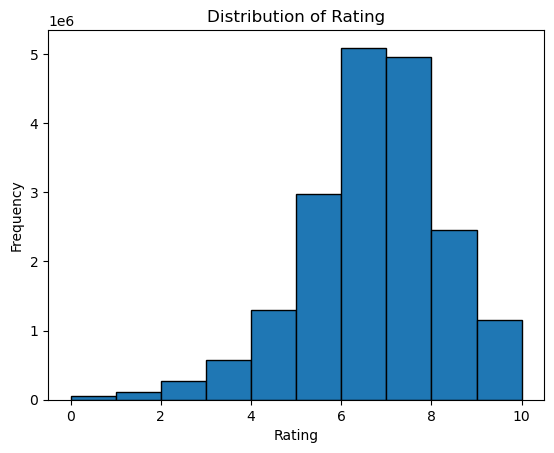

In [13]:
your_column = 'Rating'

plt.hist(user_ratings[your_column], bins=10, edgecolor='black')
plt.title(f'Distribution of {your_column}')
plt.xlabel(your_column)
plt.ylabel('Frequency')
plt.show()

In [11]:
total['sentiment'] = total['Rating'].apply(lambda x: 0 if x <= 7 else 1)

In [12]:
total.columns

Index(['BGGId', 'Rating', 'Username', 'YearPublished', 'GameWeight', 'NumWish',
       'MfgPlaytime', 'MfgAgeRec', 'NumAlternates', 'NumExpansions',
       'NumImplementations', 'Kickstarted', 'Cat:Thematic', 'Cat:Strategy',
       'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party',
       'Cat:Childrens', 'sentiment'],
      dtype='object')

In [13]:
column_names = list(total.columns.values)

In [14]:
# column_names

In [15]:
target_variable = 'sentiment'  # You need to define this based on your problem
features = [ 'YearPublished', 'GameWeight', 'NumWish',
       'MfgPlaytime', 'MfgAgeRec', 'NumAlternates', 'NumExpansions',
       'NumImplementations', 'Kickstarted', 'Cat:Thematic', 'Cat:Strategy',
       'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party',
       'Cat:Childrens']

In [16]:
label_encoder = LabelEncoder()
for column in total.select_dtypes(include=['object']).columns:
    total[column] = label_encoder.fit_transform(total[column])

In [17]:
train_df, test_df = train_test_split(total, test_size=0.2, random_state=42)

In [18]:
X_train = train_df[features]
y_train = train_df[target_variable]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

classifier = LogisticRegression(random_state=1,n_jobs=-1)
classifier.fit(X_train, y_train)

In [44]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# # X, y = make_classification(n_samples=100, random_state=1)
# # X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
# #                                                     random_state=1)
# clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
# clf.predict_proba(X_test[:1])
# clf.predict(X_test[:5, :])
# clf.score(X_test, y_test)

In [ ]:
X_test = test_df[features]
y_test = test_df[target_variable]

predictions = classifier.predict(X_test)
# predictions = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

In [31]:
# pip install shap
train_df

,BGGId,Rating,Username,YearPublished,GameWeight,NumWish,MfgPlaytime,MfgAgeRec,NumAlternates,NumExpansions,...,Theme_Geocaching,Theme_Ecology,Theme_Chernobyl,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification,sentiment
476271,254640,8.0,407939,2018,1.0453,3054,20,8,14,4,...,0,0,0,0,0,0,0,0,0,1
805352,22,9.0,166736,1979,4.5277,1528,240,12,1,0,...,0,0,0,0,0,0,0,0,0,1
770372,207016,7.0,56253,2017,2.1111,592,45,8,2,1,...,0,0,0,0,0,0,0,0,0,0
891381,5217,5.0,287432,1956,2.9333,86,20,10,2,0,...,0,0,0,0,0,0,0,0,0,0
807612,266444,3.0,390010,2018,2.0000,58,60,8,6,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,42215,6.0,42975,2009,2.1299,3077,60,10,0,1,...,0,0,0,0,0,0,0,0,0,0
365838,12942,7.0,160834,2004,1.1374,2510,20,8,22,2,...,0,0,0,0,0,0,0,0,0,0
131932,54998,7.0,188438,2009,2.8176,5936,90,13,5,7,...,0,0,0,0,0,0,0,0,0,0
671155,175621,6.0,196182,2015,2.5141,422,40,13,3,26,...,0,0,0,0,0,0,0,0,0,0


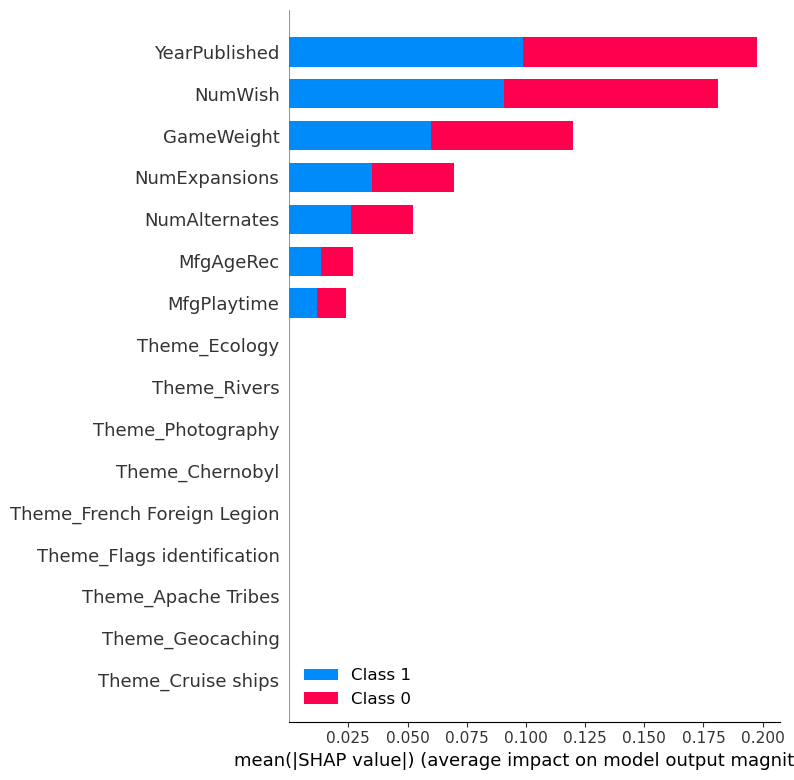

AttributeError: 'list' object has no attribute 'shape'

In [32]:
import shap

def predict_and_explain(user_id, game_id):
    # Assuming 'user_id' and 'game_id' are the identifiers for the user and game in your dataset

    # Extract user and game features
    user_features = total.loc[total['Username'] == user_id, features]
    game_features = total.loc[total['BGGId'] == game_id, features]

    # Ensure both user and game exist in the dataset
    if user_features.empty or game_features.empty:
        return "User or game not found in the dataset", None

    # Get the binary prediction
    prediction = classifier.predict(game_features)

    # Use SHAP to calculate feature importances
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer.shap_values(game_features)

    # Summarize the feature importance
    explanation_summary = shap.summary_plot(shap_values, game_features, feature_names=features)

    if prediction[0] == 1:
        explanation = "The model predicts that the user is interested in the game."
    else:
        explanation = "The model predicts that the user is not interested in the game."

    # Suggest counterfactuals to yield a positive prediction
    if shap_values.shape[0] > 1:
        counterfactuals = shap.force_plot(explainer.expected_value[0], shap_values[0], game_features)
    else:
        counterfactuals = shap.force_plot(explainer.expected_value, shap_values[0], game_features)

    explanation += "\n\nSuggested counterfactuals to make the user interested:\n"
    explanation += counterfactuals


    return prediction[0], explanation

# Example usage
user_id_example = 407939  # Replace with an actual user ID
game_id_example = 254640  # Replace with an actual game ID

prediction, explanation = predict_and_explain(user_id_example, game_id_example)

print("Prediction:", prediction)
print("Explanation:", explanation)
